In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model, Sequential
from keras.preprocessing import image
from keras import optimizers

In [ ]:
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.initializers import glorot_uniform

In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os

os.chdir('/content/drive/MyDrive')

In [ ]:
batch_size = 16
img_height = 256
img_width = 128

train_ds = keras.preprocessing.image_dataset_from_directory(
  '크롭데이터셋',
  validation_split=0.2,
  subset="training",
  seed=2017,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '크롭데이터셋',
  validation_split=0.2,
  subset="validation",
  seed=2017,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7790 files belonging to 9 classes.
Using 6232 files for training.
Found 7790 files belonging to 9 classes.
Using 1558 files for validation.


In [ ]:
def make_aug_layer(rotation_factor=0.2, contrast_factor=0.4, seed=42):
    augmentation_layer = keras.models.Sequential([
        keras.layers.RandomFlip('horizontal_and_vertical', seed=seed),
        keras.layers.RandomRotation(factor=rotation_factor, seed=seed),
        keras.layers.RandomContrast(factor=contrast_factor, seed=seed)
    ])
    return augmentation_layer

In [ ]:
#normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))

In [ ]:
#first_image = image_batch[0]

In [ ]:
#print(np.min(first_image), np.max(first_image))

In [ ]:
#len(normalized_ds)

439

In [ ]:
#len(train_ds)

439

In [ ]:
#normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#AUTOTUNE = tf.data.AUTOTUNE

#normalized_ds = normalized_ds.cache().prefetch(buffer_size=AUTOTUNE)
#normalized_ds = normalized_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
base = tf.keras.applications.xception.Xception(input_shape=(img_height, img_width,3),weights='imagenet',include_top=False)

In [ ]:
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(256,128,3)))
model.add(make_aug_layer())
model.add(base)

In [ ]:
base = tf.keras.applications.xception.Xception(input_shape=(img_height, img_width,3),weights='imagenet',include_top=False)

In [ ]:
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(256,128,3)))
model.add(make_aug_layer())
model.add(base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(9, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 128, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 4, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_1 (Dense)             (None, 9)                 589833    
                                                                 
Total params: 21,451,313
Trainable params: 21,396,785
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
check_point = ModelCheckpoint('best_model_woo_3.h5', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
model.fit(train_ds, validation_data=val_ds, batch_size=16,callbacks=[early_stopping,check_point],epochs=60, verbose=1)

Epoch 1/60
390/390 [==============================] - ETA: 0s - loss: 2.0810 - accuracy: 0.2547

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


390/390 [==============================] - 68s 165ms/step - loss: 2.0810 - accuracy: 0.2547 - val_loss: 2.2507 - val_accuracy: 0.2593
Epoch 2/60
390/390 [==============================] - 64s 163ms/step - loss: 1.8308 - accuracy: 0.3341 - val_loss: 1.9993 - val_accuracy: 0.3171
Epoch 3/60
390/390 [==============================] - 64s 164ms/step - loss: 1.7415 - accuracy: 0.3737 - val_loss: 1.6996 - val_accuracy: 0.3793
Epoch 4/60
390/390 [==============================] - 62s 157ms/step - loss: 1.6498 - accuracy: 0.4095 - val_loss: 1.7114 - val_accuracy: 0.3691
Epoch 5/60
390/390 [==============================] - 62s 157ms/step - loss: 1.5889 - accuracy: 0.4251 - val_loss: 1.9440 - val_accuracy: 0.3440
Epoch 6/60
390/390 [==============================] - 61s 157ms/step - loss: 1.5229 - accuracy: 0.4547 - val_loss: 1.8034 - val_accuracy: 0.3960
Epoch 7/60
390/390 [==============================] - 64s 164ms/step - loss: 1.4883 - accuracy: 0.4623 - val_loss: 1.4982 - val_accuracy: 0.4

In [ ]:
a=tf.keras.preprocessing.image.load_img(
    "크롭데이터셋/바캉스_크롭/crop_1.jpg", grayscale=False, color_mode="rgb", target_size=(256,128), interpolation="nearest"
)

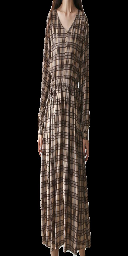

In [ ]:
a

In [ ]:
model.predict(a)

ValueError: ignored

In [ ]:
from PIL import Image

In [ ]:
a=Image.img_to_array(a)

AttributeError: ignored